In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('TensorFlow version:', tf.__version__)


np.set_printoptions(precision=3)

TensorFlow version: 2.2.0


In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7388457752154489768
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14552413978143615366
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3872391168
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10597965789428898931
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10405188235207667304
physical_device_desc: "device: XLA_GPU device"
]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv',)
print('Test and train loaded sucessfully!')

Test and train loaded sucessfully!


## Explore the data

In [4]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


## Split X and y

In [8]:
# Make the training set between 0 to 1 to make optimizer stable
X_train = np.array(train_df.iloc[:,1:]) / 255
y_train = np.array(train_df.iloc[:,0])
# same here
X_test = np.array(test_df.iloc[:,1:]) / 255
y_test = np.array(test_df.iloc[:,0])


### Split X_train into training set and validation set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val ,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)
print('size of our training set:', X_train.shape[0])
print('size of our validation set:', X_val.shape[0])

size of our training set: 48000
size of our validation set: 12000


In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
y_train

array([6, 5, 0, ..., 7, 4, 9])

### Visualize random samples from each label from the training set

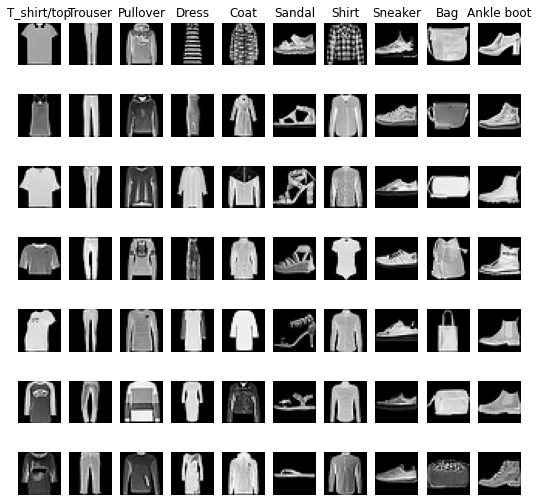

In [58]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)
samples_per_class = 7
plt.figure(figsize=(9, 9))
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace = False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()


### Format the datas parameter and scandardize the pixel values

In [13]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_val = X_val.reshape(X_val.shape[0],*image_shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


## Data augmentation network

In [19]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)               

In [20]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [21]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, rotation_range=20)
datagen.fit(X_train)
history = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=256),
    steps_per_epoch=len(X_train) / 256,
    # batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(X_val, y_val),
)


Epoch 1/100
188/187 [==============================] - 7s 39ms/step - loss: 1.1765 - accuracy: 0.5993 - val_loss: 0.7047 - val_accuracy: 0.7394
Epoch 2/100
188/187 [==============================] - 7s 38ms/step - loss: 0.6995 - accuracy: 0.7428 - val_loss: 0.6132 - val_accuracy: 0.7708
Epoch 3/100
188/187 [==============================] - 7s 39ms/step - loss: 0.6160 - accuracy: 0.7741 - val_loss: 0.5412 - val_accuracy: 0.8027
Epoch 4/100
188/187 [==============================] - 7s 38ms/step - loss: 0.5675 - accuracy: 0.7927 - val_loss: 0.4962 - val_accuracy: 0.8217
Epoch 5/100
188/187 [==============================] - 7s 38ms/step - loss: 0.5341 - accuracy: 0.8073 - val_loss: 0.4850 - val_accuracy: 0.8254
Epoch 6/100
188/187 [==============================] - 7s 39ms/step - loss: 0.5099 - accuracy: 0.8156 - val_loss: 0.4830 - val_accuracy: 0.8243
Epoch 7/100
188/187 [==============================] - 7s 39ms/step - loss: 0.4962 - accuracy: 0.8195 - val_loss: 0.4557 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

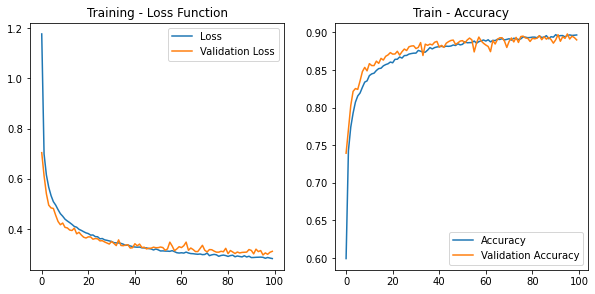

In [22]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [23]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2904
Test Accuracy : 0.8978


## Super deep network

In [19]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
deep_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 1, 1, 32)          9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)               

In [21]:
from tensorflow.keras.optimizers import Adam
deep_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [27]:
history = deep_model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=150,
    verbose=1,
    validation_data=(X_val,y_val),
)

ss: 0.2375 - accuracy: 0.9156 - val_loss: 0.2965 - val_accuracy: 0.8989
Epoch 12/150
47/47 [==============================] - 2s 32ms/step - loss: 0.2343 - accuracy: 0.9161 - val_loss: 0.3038 - val_accuracy: 0.8968
Epoch 13/150
47/47 [==============================] - 2s 32ms/step - loss: 0.2377 - accuracy: 0.9139 - val_loss: 0.2932 - val_accuracy: 0.9010
Epoch 14/150
47/47 [==============================] - 2s 32ms/step - loss: 0.2357 - accuracy: 0.9153 - val_loss: 0.2983 - val_accuracy: 0.8972
Epoch 15/150
47/47 [==============================] - 2s 32ms/step - loss: 0.2359 - accuracy: 0.9140 - val_loss: 0.3017 - val_accuracy: 0.8958
Epoch 16/150
47/47 [==============================] - 2s 32ms/step - loss: 0.2307 - accuracy: 0.9167 - val_loss: 0.2888 - val_accuracy: 0.9020
Epoch 17/150
47/47 [==============================] - 2s 32ms/step - loss: 0.2269 - accuracy: 0.9185 - val_loss: 0.2932 - val_accuracy: 0.9003
Epoch 18/150
47/47 [==============================] - 2s 32ms/step - l

Text(0.5, 1.0, 'Train - Accuracy')

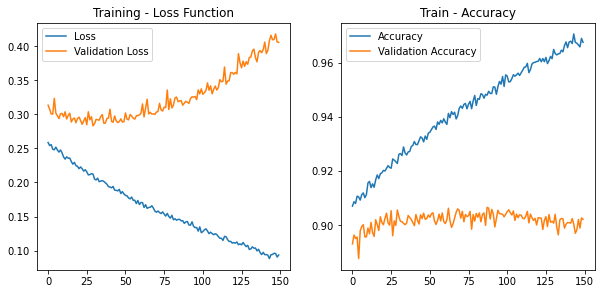

In [28]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [29]:
score = deep_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3847
Test Accuracy : 0.8997


## CONV with dropout

In [41]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 80)                64080     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [42]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [43]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
47/47 [==============================] - 2s 33ms/step - loss: 1.2856 - accuracy: 0.5832 - val_loss: 0.7038 - val_accuracy: 0.7141
Epoch 2/50
47/47 [==============================] - 1s 31ms/step - loss: 0.6009 - accuracy: 0.7743 - val_loss: 0.5325 - val_accuracy: 0.8028
Epoch 3/50
47/47 [==============================] - 1s 31ms/step - loss: 0.4979 - accuracy: 0.8172 - val_loss: 0.4630 - val_accuracy: 0.8325
Epoch 4/50
47/47 [==============================] - 1s 31ms/step - loss: 0.4470 - accuracy: 0.8403 - val_loss: 0.4257 - val_accuracy: 0.8494
Epoch 5/50
47/47 [==============================] - 1s 31ms/step - loss: 0.4158 - accuracy: 0.8505 - val_loss: 0.4059 - val_accuracy: 0.8561
Epoch 6/50
47/47 [==============================] - 1s 31ms/step - loss: 0.3965 - accuracy: 0.8572 - val_loss: 0.3924 - val_accuracy: 0.8602
Epoch 7/50
47/47 [==============================] - 1s 31ms/step - loss: 0.3773 - accuracy: 0.8640 - val_loss: 0.3735 - val_accuracy: 0.8687
Epoch 8/50
47

Text(0.5, 1.0, 'Train - Accuracy')

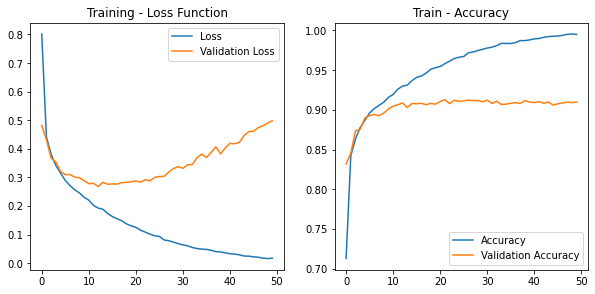

In [40]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [36]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2615
Test Accuracy : 0.9092


## CONV

In [24]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [25]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [26]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
47/47 [==============================] - 2s 42ms/step - loss: 1.1664 - accuracy: 0.5980 - val_loss: 1.9239 - val_accuracy: 0.6824
Epoch 2/50
47/47 [==============================] - 2s 36ms/step - loss: 0.5609 - accuracy: 0.7959 - val_loss: 1.7206 - val_accuracy: 0.7533
Epoch 3/50
47/47 [==============================] - 2s 36ms/step - loss: 0.4623 - accuracy: 0.8332 - val_loss: 1.5437 - val_accuracy: 0.7747
Epoch 4/50
47/47 [==============================] - 2s 36ms/step - loss: 0.4091 - accuracy: 0.8547 - val_loss: 1.3487 - val_accuracy: 0.8345
Epoch 5/50
47/47 [==============================] - 2s 36ms/step - loss: 0.3747 - accuracy: 0.8662 - val_loss: 1.1484 - val_accuracy: 0.8127
Epoch 6/50
47/47 [==============================] - 2s 36ms/step - loss: 0.3509 - accuracy: 0.8745 - val_loss: 0.9387 - val_accuracy: 0.8511
Epoch 7/50
47/47 [==============================] - 2s 36ms/step - loss: 0.3343 - accuracy: 0.8794 - val_loss: 0.7655 - val_accuracy: 0.8712
Epoch 8/50
47

Text(0.5, 1.0, 'Train - Accuracy')

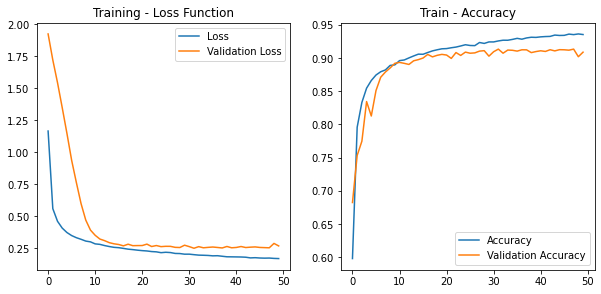

In [45]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [46]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2541
Test Accuracy : 0.9098


## Report

In [63]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
#Get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.86      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.84      0.89      0.86      1000
     Class 3       0.92      0.90      0.91      1000
     Class 4       0.89      0.83      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.74      0.76      0.75      1000
     Class 7       0.93      0.98      0.95      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



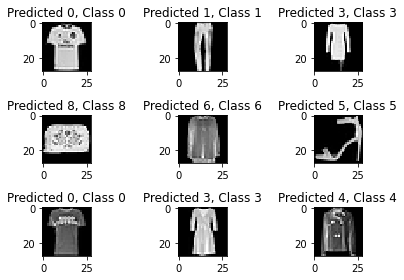

In [64]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

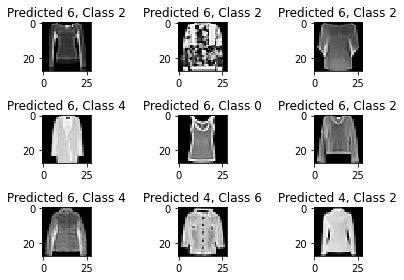

In [65]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

In [70]:
for y, cls in enumerate(class_names):
    print(y, cls)

0 T_shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [75]:
layer_outputs = [layer.output for layer in cnn_model.layers[:8]]
activation_model = models.Model(input=cnn_model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))
layer_names = []
for layer in cnn_model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

AttributeError: 'Sequential' object has no attribute 'Model'

## 5 layers

In [14]:
five_layer_mlp = tf.keras.Sequential([
    # tf.keras.layers.Dense(64, name='fc2', activation='softmax', input_shape=image_shape)
    tf.keras.layers.Flatten(input_shape=image_shape),
    tf.keras.layers.Dense(128, name='fc1', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(64, name='fc2', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(64, name='fc3', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(32, name='fc4', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(32, name='fc6', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(32, name='fc7', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(32, name='fc8', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(32, name='fc9', activation='softmax', input_shape=image_shape)

])
five_layer_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               100480    
_________________________________________________________________
fc2 (Dense)                  (None, 64)                8256      
_________________________________________________________________
fc3 (Dense)                  (None, 64)                4160      
_________________________________________________________________
fc4 (Dense)                  (None, 32)                2080      
_________________________________________________________________
fc6 (Dense)                  (None, 32)                1056      
_________________________________________________________________
fc7 (Dense)                  (None, 32)                1

In [15]:
from tensorflow.keras.optimizers import Adam
five_layer_mlp.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [16]:
history = five_layer_mlp.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
47/47 [==============================] - 0s 10ms/step - loss: 2.2247 - accuracy: 0.3717 - val_loss: 0.8419 - val_accuracy: 0.7215
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.7561 - val_loss: 0.5894 - val_accuracy: 0.7847
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.5402 - accuracy: 0.8051 - val_loss: 0.5286 - val_accuracy: 0.8099
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 0.4875 - accuracy: 0.8280 - val_loss: 0.5200 - val_accuracy: 0.8175
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 0.4603 - accuracy: 0.8375 - val_loss: 0.4501 - val_accuracy: 0.8449
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 0.4277 - accuracy: 0.8495 - val_loss: 0.4261 - val_accuracy: 0.8497
Epoch 7/50
47/47 [==============================] - 0s 5ms/step - loss: 0.4040 - accuracy: 0.8559 - val_loss: 0.4078 - val_accuracy: 0.8577
Epoch 8/50
47/47 [=

## Loss curve

Text(0.5, 1.0, 'Train - Accuracy')

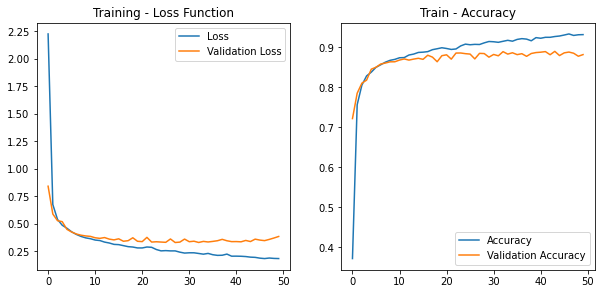

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## Testing results

In [19]:
score = five_layer_mlp.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3890
Test Accuracy : 0.8808


## Try MLP
Try three layers

In [35]:
one_layer_mlp = tf.keras.Sequential([
    # tf.keras.layers.Dense(64, name='fc2', activation='softmax', input_shape=image_shape)
    tf.keras.layers.Flatten(input_shape=image_shape),
    tf.keras.layers.Dense(64, name='fc1', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(32, name='fc2', activation='relu', input_shape=image_shape),
    tf.keras.layers.Dense(16, name='fc3', activation='softmax', input_shape=image_shape)
    
])
one_layer_mlp.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 64)                50240     
_________________________________________________________________
fc2 (Dense)                  (None, 32)                2080      
_________________________________________________________________
fc3 (Dense)                  (None, 16)                528       
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.optimizers import Adam
one_layer_mlp.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


In [37]:
history = one_layer_mlp.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
47/47 [==============================] - 0s 5ms/step - loss: 1.3252 - accuracy: 0.6071 - val_loss: 0.7131 - val_accuracy: 0.7597
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6118 - accuracy: 0.7943 - val_loss: 0.5606 - val_accuracy: 0.8121
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5172 - accuracy: 0.8242 - val_loss: 0.5017 - val_accuracy: 0.8270
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.8379 - val_loss: 0.4753 - val_accuracy: 0.8322
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.8459 - val_loss: 0.4448 - val_accuracy: 0.8458
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.8527 - val_loss: 0.4301 - val_accuracy: 0.8502
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.4043 - accuracy: 0.8588 - val_loss: 0.4170 - val_accuracy: 0.8538
Epoch 8/50
47/47 [==

## Loss curve

Text(0.5, 1.0, 'Train - Accuracy')

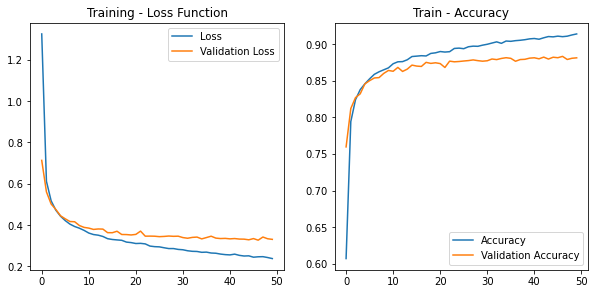

In [38]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## Testing results

In [39]:
score = one_layer_mlp.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3267
Test Accuracy : 0.8843


## Two layer model

In [21]:
one_layer_mlp = tf.keras.Sequential([
    # tf.keras.layers.Dense(64, name='fc2', activation='softmax', input_shape=image_shape)
    tf.keras.layers.Dense(32, name='fc1', activation='relu', input_shape=image_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, name='fc2', activation='softmax', input_shape=image_shape),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(8, name='fc3', activation='softmax', input_shape=image_shape),
    # tf.keras.layers.Flatten()
])
one_layer_mlp.summary()
# model.add(Flatten(input_shape=(28,28)))
# model.add(Dense(256, activation='tanh', kernel_initializer = 'he_normal' ,input_shape=(28*28,)))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 28, 28, 32)        64        
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc2 (Dense)                  (None, 16)                401424    
Total params: 401,488
Trainable params: 401,488
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [22]:
from tensorflow.keras.optimizers import Adam
one_layer_mlp.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
print("Compiled finished!")

Compiled finished!


## Training

In [23]:
history = one_layer_mlp.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
47/47 [==============================] - 2s 32ms/step - loss: 0.9575 - accuracy: 0.6989 - val_loss: 0.6166 - val_accuracy: 0.7867
Epoch 2/50
47/47 [==============================] - 1s 30ms/step - loss: 0.5583 - accuracy: 0.8049 - val_loss: 0.5252 - val_accuracy: 0.8188
Epoch 3/50
47/47 [==============================] - 1s 30ms/step - loss: 0.5003 - accuracy: 0.8269 - val_loss: 0.4918 - val_accuracy: 0.8292
Epoch 4/50
47/47 [==============================] - 1s 30ms/step - loss: 0.4700 - accuracy: 0.8378 - val_loss: 0.4692 - val_accuracy: 0.8338
Epoch 5/50
47/47 [==============================] - 1s 30ms/step - loss: 0.4525 - accuracy: 0.8438 - val_loss: 0.4630 - val_accuracy: 0.8359
Epoch 6/50
47/47 [==============================] - 1s 30ms/step - loss: 0.4418 - accuracy: 0.8457 - val_loss: 0.4516 - val_accuracy: 0.8395
Epoch 7/50
47/47 [==============================] - 1s 30ms/step - loss: 0.4320 - accuracy: 0.8490 - val_loss: 0.4411 - val_accuracy: 0.8444
Epoch 8/50
47

## Loss curve

Text(0.5, 1.0, 'Train - Accuracy')

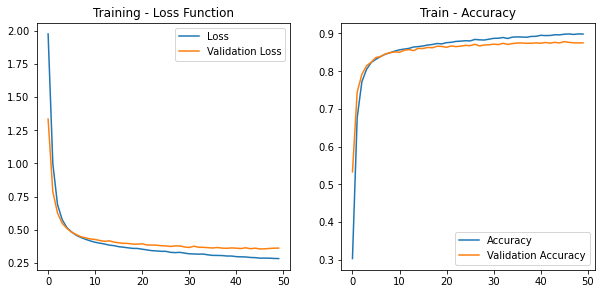

In [25]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## Testing result

In [26]:
score = one_layer_mlp.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3549
Test Accuracy : 0.8766


## Convolution model

In [46]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), # flatten out the layers
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')  
])
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                173088    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

## Compile the model

In [47]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

## Training

In [48]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/100
12/12 [==============================] - 1s 124ms/step - loss: 1.7290 - accuracy: 0.4668 - val_loss: 1.1244 - val_accuracy: 0.6559
Epoch 2/100
12/12 [==============================] - 1s 96ms/step - loss: 0.9054 - accuracy: 0.7096 - val_loss: 0.7438 - val_accuracy: 0.7483
Epoch 3/100
12/12 [==============================] - 1s 95ms/step - loss: 0.6770 - accuracy: 0.7647 - val_loss: 0.6190 - val_accuracy: 0.7773
Epoch 4/100
12/12 [==============================] - 1s 95ms/step - loss: 0.5851 - accuracy: 0.7912 - val_loss: 0.5501 - val_accuracy: 0.8018
Epoch 5/100
12/12 [==============================] - 1s 95ms/step - loss: 0.5279 - accuracy: 0.8150 - val_loss: 0.5063 - val_accuracy: 0.8222
Epoch 6/100
12/12 [==============================] - 1s 96ms/step - loss: 0.4930 - accuracy: 0.8285 - val_loss: 0.4719 - val_accuracy: 0.8342
Epoch 7/100
12/12 [==============================] - 1s 95ms/step - loss: 0.4639 - accuracy: 0.8399 - val_loss: 0.4513 - val_accuracy: 0.8460
Epoch

## loss curve

Text(0.5, 1.0, 'Train - Accuracy')

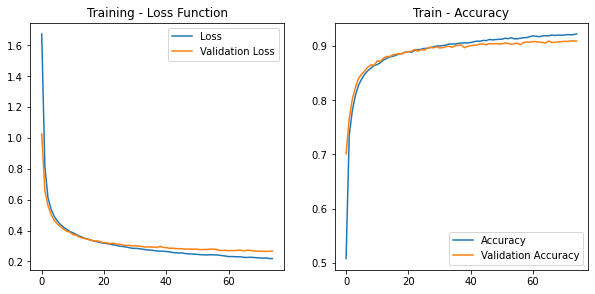

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## Testing Result

In [18]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2460
Test Accuracy : 0.9161
